In [1]:
import os, datetime
import numpy as np
import pandas as pd
from pydsstools.heclib.dss import HecDss
from matplotlib import pyplot as plt

In [2]:
# User defined inputs

# HMS File Paths
hms_project_directory = r"D:\AMH Philippines, Inc\EDC Projects - 20 NP24.XXX Amacan Water Balance HH\06 WORK FILES\05 HEC HMS\hms_edc_amacan_rdtc_calib"
hms_basin_name = 'EDC_Basin'
hms_dss_name = 'edc_run_v1'

# Observed Streamflow Data File path
xl_path = r"D:\AMH Philippines, Inc\EDC Projects - 20 NP24.XXX Amacan Water Balance HH\06 WORK FILES\08 HH-Calcs\observed_data.xlsx"

# ---- Working File Paths ----
hms_basin_path = os.path.join(hms_project_directory, f'{hms_basin_name}.basin')
hms_dss_path = os.path.join(hms_project_directory, f'{hms_dss_name}.dss')
csv_save_path = os.path.join(hms_project_directory, 'NSE_computation', 'NSE.csv')

print(f'HMS Project Directory: {os.path.basename(hms_project_directory)}')
print(f'HMS Working Basin File: {os.path.basename(hms_basin_path)}')
print(f'HMS Working DSS File: {os.path.basename(hms_dss_path)}')
print(f'HMS CSV Save File: {os.path.basename(csv_save_path)}')

HMS Project Directory: hms_edc_amacan_rdtc_calib
HMS Working Basin File: EDC_Basin.basin
HMS Working DSS File: edc_run_v1.dss
HMS CSV Save File: NSE.csv


C:\Users\AMH-L156\AppData\Local\Temp\ipykernel_57208\3266124762.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


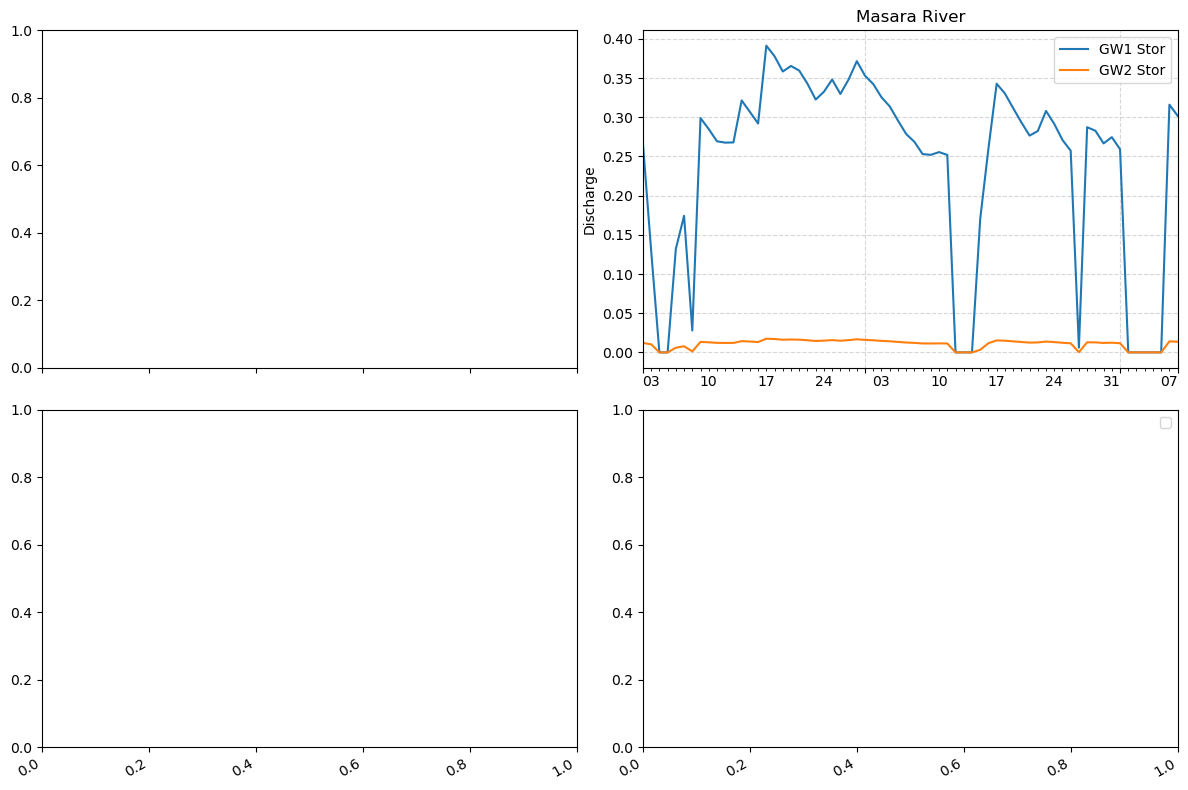

In [17]:
mapping = {
        'Bunlang EP': ['Bunlang Catchment 1', 'Bunlang Catchment 2'],
        'Masara EP':  ['Masara Catchment'],
        'Simsimin Catchment': ['Simsimin Catchment']
    }
# Create a 2×2 grid of axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

with HecDss.Open(hms_dss_path) as dss:    
    # DSS Flow Path
    dss_path = f'//Masara EP/FLOW/01Jan2025/1Day/RUN:edc_run_v1/' # DSS Flow Path

    dss_path_canopy_storage = r'//Masara Catchment/STORAGE-CANOPY/01Jan2025/1Day/RUN:edc_run_v1/' # Canopy Storage Path
    dss_path_gw1_storage = r"//Masara Catchment/STORAGE-GW-1/01Jan2025/1Day/RUN:edc_run_v1/" # GW1 Storage
    dss_path_gw2_storage = r"//Masara Catchment/STORAGE-GW-2/01Jan2025/1Day/RUN:edc_run_v1/" # GW2 Storage
    dss_path_soil_storage = r"//Masara Catchment/STORAGE-SOIL/01Jan2025/1Day/RUN:edc_run_v1/" # Soil Storage
    dss_path__surface_storage = r"//Masara Catchment/STORAGE-SOIL/01Jan2025/1Day/RUN:edc_run_v1/"
    storage_list = [dss_path_gw1_storage,dss_path_gw2_storage,dss_path_soil_storage]
    storage_names = [ 'GW1 Stor', 'GW2 Stor', 'Soil Stor']



    # Plot Storage But not Soil Storage
    for paths, name in zip(storage_list[:-1], storage_names[:-1]):
        ax = axes[1]
        ts = dss.read_ts(paths, window=('02Feb2025 00:00:00','08Apr2025 00:00:00'), trim_missing=True)
        df_ts = pd.DataFrame({'date': np.array(ts.pytimes), name: ts.values})
        df_ts.set_index('date', inplace=True)
        df_ts.plot(ax=ax)
        

    ax.set_title('Masara River')
    ax.grid(True, which='major', axis='both', linestyle = '--', alpha = 0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('Discharge')

fig.autofmt_xdate()
fig.tight_layout()
plt.legend()
plt.show()

In [18]:
df_ts

,GW2 Stor
date,
2025-02-02,1.201692e-02
2025-02-03,1.032138e-02
2025-02-04,6.853424e-13
2025-02-05,5.794071e-24
2025-02-06,5.947609e-03
...,...
2025-04-04,2.329061e-29
2025-04-05,1.702003e-40
2025-04-06,0.000000e+00
